For example, the file http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data contains data on concentrations of 13 different chemicals in wines grown in the same region in Italy that are derived from three different cultivars. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from scipy import stats





data = pd.read_csv("wine.data", header=None)
data.columns = ["V"+str(i) for i in range(1, len(data.columns)+1)]  # rename column names to be similar to R naming convention
data.V1 = data.V1.astype(str)
X = data.loc[:, "V2":]  # independent variables data
y = data.V1  # dependednt variable data
data.head(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


Once you have read a multivariate data set into python, the next step is usually to make a plot of the data.
One common way of plotting multivariate data is to make a matrix scatterplot, showing each pair of variables plotted against each other.

C:\Users\irina\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """Entry point for launching an IPython kernel.


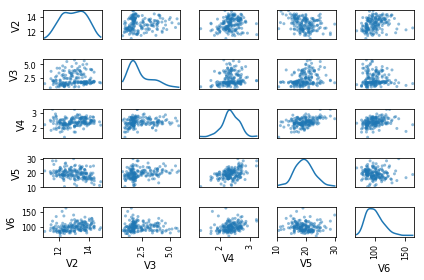

In [4]:
pd.tools.plotting.scatter_matrix(data.loc[:, "V2":"V6"], diagonal="kde")
plt.tight_layout()
plt.show()

In this matrix scatterplot, the diagonal cells show histograms of each of the variables, in this case the concentrations of the first five chemicals (variables V2, V3, V4, V5, V6).

Each of the off-diagonal cells is a scatterplot of two of the five chemicals, for example, the second cell in the first row is a scatterplot of V2 (y-axis) against V3 (x-axis).

If you see an interesting scatterplot for two variables in the matrix scatterplot, you may want to plot that scatterplot in more detail, with the data points labelled by their group (their cultivar in this case).

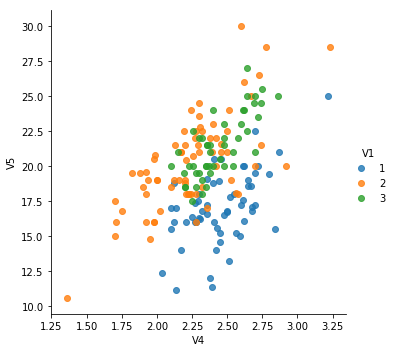

In [5]:
sns.lmplot("V4", "V5", data, hue="V1", fit_reg=False)

Another type of plot that is useful is a profile plot, which shows the variation in each of the variables, by plotting the value of each of the variables for each of the samples.

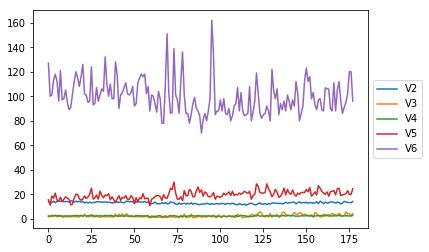

In [6]:
ax = data[["V2","V3","V4","V5","V6"]].plot()
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [7]:
X.apply(np.mean)

V2      13.000618
V3       2.336348
V4       2.366517
V5      19.494944
V6      99.741573
V7       2.295112
V8       2.029270
V9       0.361854
V10      1.590899
V11      5.058090
V12      0.957449
V13      2.611685
V14    746.893258
dtype: float64

In [8]:
X.apply(np.std)

V2       0.809543
V3       1.114004
V4       0.273572
V5       3.330170
V6      14.242308
V7       0.624091
V8       0.996049
V9       0.124103
V10      0.570749
V11      2.311765
V12      0.227929
V13      0.707993
V14    314.021657
dtype: float64

We can then calculate the mean and standard deviations of the 13 chemicals’ concentrations, for just the cultivar 2 samples

In [9]:
class2data = data[y=="2"]

In [10]:
class2data.loc[:, "V2":].apply(np.mean)

V2      12.278732
V3       1.932676
V4       2.244789
V5      20.238028
V6      94.549296
V7       2.258873
V8       2.080845
V9       0.363662
V10      1.630282
V11      3.086620
V12      1.056282
V13      2.785352
V14    519.507042
dtype: float64

In [11]:
class2data.loc[:, "V2":].apply(np.std)

V2       0.534162
V3       1.008391
V4       0.313238
V5       3.326097
V6      16.635097
V7       0.541507
V8       0.700713
V9       0.123085
V10      0.597813
V11      0.918393
V12      0.201503
V13      0.493064
V14    156.100173
dtype: float64

In [12]:
def calcWithinGroupsCovariance(variable1, variable2, groupvariable):
    levels = sorted(set(groupvariable))
    numlevels = len(levels)
    Covw = 0.0
    # get the covariance of variable 1 and variable 2 for each group:
    for leveli in levels:
        levelidata1 = variable1[groupvariable==leveli]
        levelidata2 = variable2[groupvariable==leveli]
        mean1 = np.mean(levelidata1)
        mean2 = np.mean(levelidata2)
        levelilength = len(levelidata1)
        # get the covariance for this group:
        term1 = 0.0
        for levelidata1j, levelidata2j in zip(levelidata1, levelidata2):
            term1 += (levelidata1j - mean1)*(levelidata2j - mean2)
        Cov_groupi = term1 # covariance for this group
        Covw += Cov_groupi
    totallength = len(variable1)
    Covw /= totallength - numlevels
    return Covw

In [13]:
calcWithinGroupsCovariance(X.V8, X.V11, y)

0.28667830215140183

In [14]:
def calcBetweenGroupsCovariance(variable1, variable2, groupvariable):
    # find out how many values the group variable can take
    levels = sorted(set(groupvariable))
    numlevels = len(levels)
    # calculate the grand means
    variable1mean = np.mean(variable1)
    variable2mean = np.mean(variable2)
    # calculate the between-groups covariance
    Covb = 0.0
    for leveli in levels:
        levelidata1 = variable1[groupvariable==leveli]
        levelidata2 = variable2[groupvariable==leveli]
        mean1 = np.mean(levelidata1)
        mean2 = np.mean(levelidata2)
        levelilength = len(levelidata1)
        term1 = (mean1 - variable1mean) * (mean2 - variable2mean) * levelilength
        Covb += term1
    Covb /= numlevels - 1
    return Covb

In [15]:
calcBetweenGroupsCovariance(X.V8, X.V11, y)

-60.4107748359163

Thus, for V8 and V11, the between-groups covariance is -60.41 and the within-groups covariance is 0.29. Since the within-groups covariance is positive (0.29), it means V8 and V11 are positively related within groups: for individuals from the same group, individuals with a high value of V8 tend to have a high value of V11, and vice versa. Since the between-groups covariance is negative (-60.41), V8 and V11 are negatively related between groups: groups with a high mean value of V8 tend to have a low mean value of V11, and vice versa.

In [16]:
corr = stats.pearsonr(X.V2, X.V3)
print("p-value:\t", corr[1])
print("cor:\t\t", corr[0])

p-value:	 0.21008198597074534
cor:		 0.094396940910414


This tells us that the correlation coefficient is about 0.094, which is a very weak correlation. Furthermore, the p-value for the statistical test of whether the correlation coefficient is significantly different from zero is 0.21. This is much greater than 0.05 (which we can use here as a cutoff for statistical significance), so there is very weak evidence that that the correlation is non-zero.

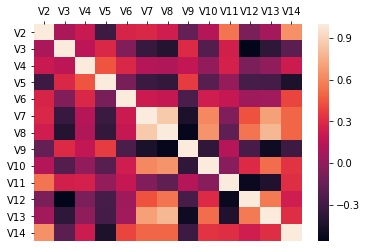

In [17]:
corrmat = X.corr()
sns.heatmap(corrmat, vmax=1., square=False).xaxis.tick_top()

In [18]:
import scipy.stats as stats

print(stats.spearmanr(data.V1,data.V2))

C:\Users\irina\Anaconda3\lib\site-packages\scipy\stats\stats.py:245: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


SpearmanrResult(correlation=-0.3541669168504762, pvalue=1.234477484385958e-06)


In [20]:
standardisedX = scale(X)
standardisedX = pd.DataFrame(standardisedX, index=X.index, columns=X.columns)

In [21]:
pca = PCA().fit(standardisedX)
def screeplot(pca, standardised_values):
    y = np.std(pca.transform(standardised_values), axis=0)**2
    x = np.arange(len(y)) + 1
    plt.plot(x, y, "o-")
    plt.xticks(x, ["Comp."+str(i) for i in x], rotation=60)
    plt.ylabel("Variance")
    plt.show()

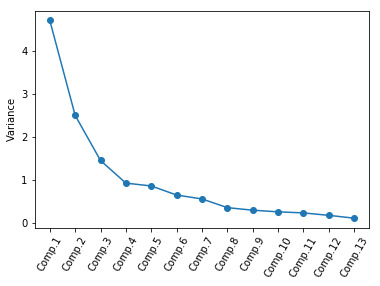

In [22]:
screeplot(pca, standardisedX)

The most obvious change in slope in the scree plot occurs at component 4, which is the “elbow” of the scree plot. Therefore, it cound be argued based on the basis of the scree plot that the first three components should be retained.

In [25]:
def pca_scatter(pca, standardised_values, classifs):
    foo = pca.transform(standardised_values)
    bar = pd.DataFrame(list(zip(foo[:, 0], foo[:, 1], classifs)), columns=["PC1", "PC2", "Class"])
    sns.lmplot("PC1", "PC2", bar, hue="Class", fit_reg=False)

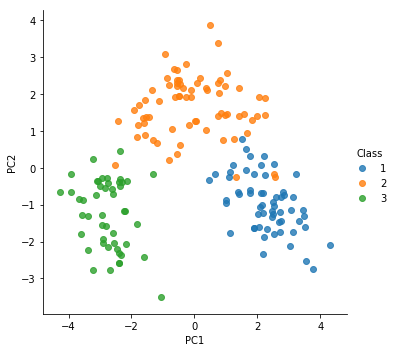

In [26]:
pca_scatter(pca, standardisedX, y)